In [3]:
# before proceeding, you should have already ran notebook 1.1 so that there is an asari results directory to work with

import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# lets find the previous results and load the composite map

asari_subdir = None
for x in os.listdir("../../"):
    if x.startswith("Results_MT02_results"):
        asari_subdir = os.path.join(os.path.abspath("../../"), x)

cmap = pickle.load(open(os.path.join(asari_subdir, 'export', 'cmap.pickle'), 'rb'))

In [6]:
# confirming that the cmap is of type dict and examining the keys it contains.

print(type(cmap))
print(cmap.keys())



<class 'dict'>
dict_keys(['_number_of_samples_', 'rt_length', 'rt_reference_landmarks', 'rt_records', 'dict_scan_rtime', 'list_mass_tracks', 'MassGrid'])


In [8]:
# the composite map contains multiple mass tracks. These can be accessed as follows:

cmap['list_mass_tracks'][583]

{'id_number': 583,
 'mz': 169.08582544326782,
 'intensity': array([     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,  68266,
             0,      0, 127637,  56312, 502071, 137180,  93614,  20907,
         15731,      0,   8809,      0,      0,      0,      0,   9295,
             0,  15174,  52085,      0,  25525,  37811,      0,      0,
             0,   8088,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,   9856,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,   9186,      0,      0,      0,
     

In [36]:
# lets define a function for plotting mass tracks

def plotk(track, color='m', start=100, end=400, yticks=[0, 5e7, 1e8], title=''):
    plt.figure(figsize=(8, 4))
    X = range(start, min(len(track['intensity']), end))
    Y = track['intensity'][start: min(len(track['intensity']), end)]
    plt.plot(X, Y, color=color, marker='o', markersize=4, linestyle='dashed')
    if title:
        plt.title(title)


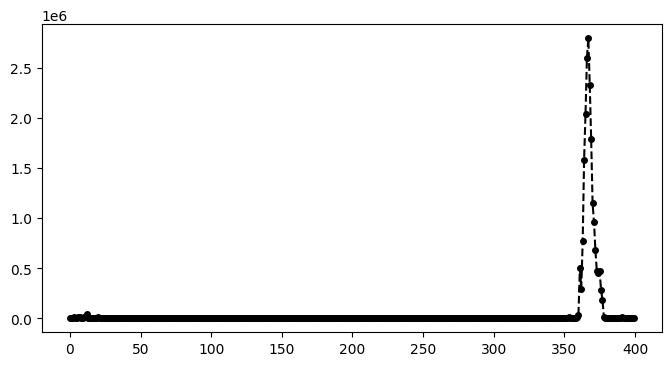

In [53]:
# and lets use it to plot some tracks.

plotk(cmap['list_mass_tracks'][3], color='k', start=00, end=400, yticks=[0, 2e8])


In [28]:
# note that the composite mass track is from cumulated signals from all samples. How do we look at the same mass track in individual samples?
# Asari stores the mapping of composite tracks to individual sample tracks in the _mass_grid_mapping file.

cmap_to_sample_map = pd.read_csv(os.path.join(asari_subdir, 'export', '_mass_grid_mapping.csv'), index_col=0)
cmap_to_sample_map


,mz,batch11_MT_20210805_005,batch12_MT_20210806_005_20210806121327,batch13_MT_20210807_005,batch14_MT_20210808_005,batch14_MT_20210808_087,batch14_MT_20210808_089,batch14_MT_20210808_179,batch14_MT_20210808_181
0,83.060348,1.0,2.0,1.0,3.0,0.0,1.0,1.0,0.0
1,84.044374,2.0,3.0,2.0,4.0,1.0,2.0,2.0,1.0
2,84.080780,3.0,4.0,3.0,5.0,2.0,3.0,4.0,2.0
3,84.911240,4.0,5.0,4.0,6.0,3.0,4.0,5.0,3.0
4,85.027376,5.0,6.0,5.0,7.0,4.0,5.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...
5904,930.986023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3694.0
5905,945.758316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3696.0
5906,952.511292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698.0
5907,979.998260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3702.0


In [29]:
myfiles = ['batch11_MT_20210805_005', 'batch12_MT_20210806_005_20210806121327', 'batch13_MT_20210807_005']
cmap_to_sample_map.iloc[3, :]

mz                                        84.91124
batch11_MT_20210805_005                    4.00000
batch12_MT_20210806_005_20210806121327     5.00000
batch13_MT_20210807_005                    4.00000
batch14_MT_20210808_005                    6.00000
batch14_MT_20210808_087                    3.00000
batch14_MT_20210808_089                    4.00000
batch14_MT_20210808_179                    5.00000
batch14_MT_20210808_181                    3.00000
Name: 3, dtype: float64

In [32]:
# the above output shows the mapping of the cmap mass track to mass tracks in the samples. They should be integers but are not due to pandas inferring them as float. Next we can use this mapping to load the per sample mass tracks as follows: 

data = []
for f in myfiles:
    with open(os.path.join(asari_subdir, 'pickle', f+'.pickle'), 'rb') as fh:
        data.append(pickle.load(fh))

In [33]:
# lets take a look at the sample mass tracks
data[0].keys()

dict_keys(['sample_id', 'input_file', 'ion_mode', 'max_scan_number', 'list_mass_tracks', 'anchor_mz_pairs', 'number_anchor_mz_pairs'])

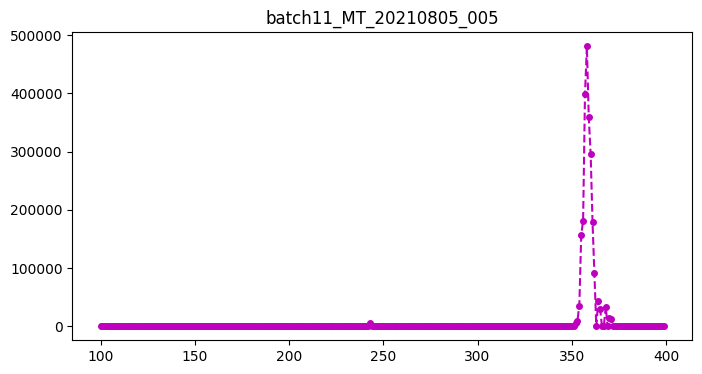

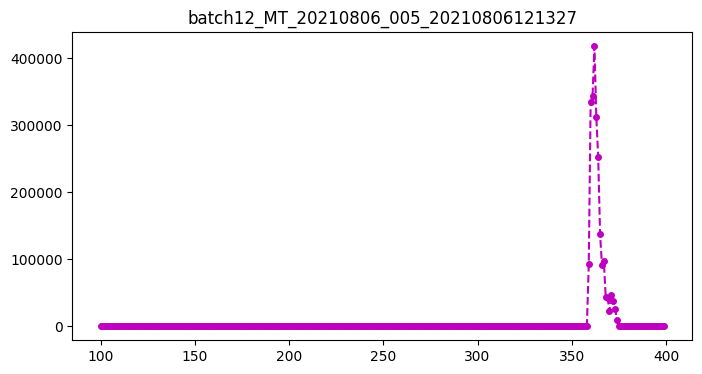

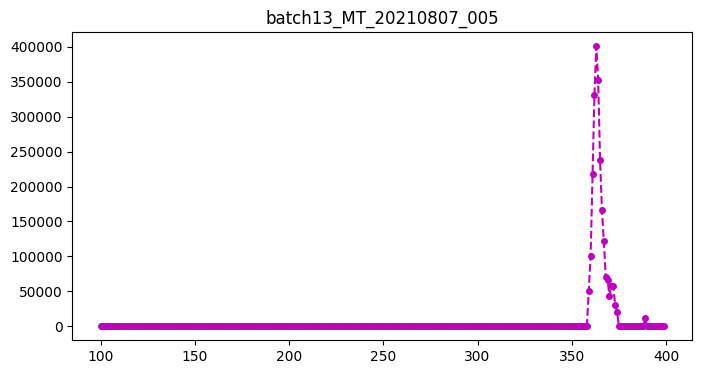

In [46]:
# lets do some plotting, lets plot the same mass track for all the samples in myfiles

for f, d in zip(myfiles, data):
    x = cmap_to_sample_map.iloc[3][f]
    plotk(d['list_mass_tracks'][int(x)], title=f)

In [55]:
# with the above data plotted, now we can explain composte mass tracks a different way. 
# composite mass tracks are produced by aligning then summing the sample mass tracks. here we skip the alignment but perform the summation. 

composite = {
    'intensity': None
}

for f, d in zip(myfiles, data):
    x = cmap_to_sample_map.iloc[3][f]
    lmt = d['list_mass_tracks'][int(x)]['intensity'][:400]
    if composite['intensity'] is None:
        composite['intensity'] = lmt
    else:
        composite['intensity'] += lmt



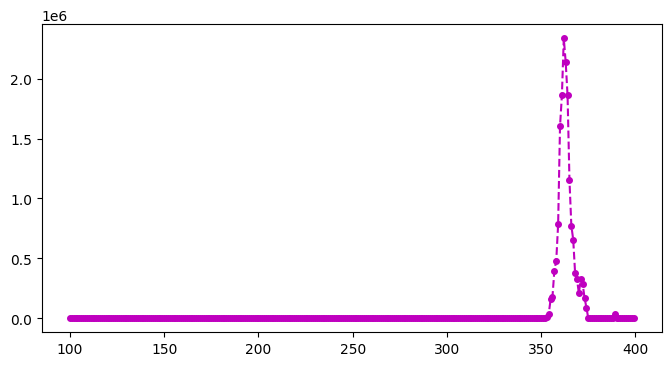

In [58]:
plotk(composite)

# this composite is very similar to the mass track we plotted earlier from the cmap file. 
# in asari, the peak picking of this composite yields features, and the corresponding regions in each sample are then referenced to yield the intensity per sample. 